# 확률

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp

import scipy.stats

#시각화 패키지
import matplotlib.pyplot as plt

#시각화에서 한글을 사용하기 위한 설정
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    
#시각화에서 음수를 표현하기 위한 설정
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False 

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한 
%precision 3
# DataFrame의 출력을 소수점 이하 3자리로 제한 
pd.set_option('precision', 3)

## 집합 

### set 의 생성

In [2]:
a = set([1, 2, 3, 3, 2])  # 중복된 자료는 없어진다.
print(a)

b = frozenset(['H', 'T'])
print(b)

c = {"\u2660", "\u2661", "\u2662", "\u2663"}
print(c)

print(type(c))

print(len(a), len(b), len(c))

{1, 2, 3}
frozenset({'T', 'H'})
{'♡', '♣', '♠', '♢'}
<class 'set'>
3 2 4


### 합집합 과 교집합

In [3]:
A1 = set([1, 2, 3, 4])
A2 = set([2, 4, 6])
A3 = set([1, 2, 3])
A4 = set([2, 3, 4, 5, 6])

print(A1.union(A2))
print(A2 | A1)

print(A3.intersection(A4))
print(A4 & A3)

{1, 2, 3, 4, 6}
{1, 2, 3, 4, 6}
{2, 3}
{2, 3}


### 전체 집합, 부분 집합

In [4]:
print(A3.issubset(A1))
print(A3 <= A1)
print(A3.issubset(A2))
print(A3 <= A2)
print(A3 <= A3)
print(A3 < A3)
print()

True
True
False
False
True
False



### 차집합

In [5]:
print(A1.difference(A2))
print(A1 - A2)

{1, 3}
{1, 3}


### 공집합

In [6]:
empty_set = set([])
print(empty_set)
print(empty_set < A1)
print(empty_set.intersection(A1))
print(empty_set.union(A1))

set()
True
set()
{1, 2, 3, 4}


## 확률

### 결합확률

In [7]:
import numpy as np
from pgmpy.factors.discrete import JointProbabilityDistribution as JPD

#독립 확률
print(np.array([12, 8]) / 20)
px = JPD(['X'], [2], np.array([12, 8]) / 20)
print(px)

[0.6 0.4]
+------+--------+
| X    |   P(X) |
+======+========+
| X(0) | 0.6000 |
+------+--------+
| X(1) | 0.4000 |
+------+--------+


In [8]:
#남자 12명(짧은머리 3 긴머리 9) 여자 8명(긴머리7 짧은 머리1)인 경우의 결합 확률
pxy = JPD(['X', 'Y'], [2, 2], np.array([3, 9, 7, 1]) / 20)
print(pxy)

+------+------+----------+
| X    | Y    |   P(X,Y) |
+======+======+==========+
| X(0) | Y(0) |   0.1500 |
+------+------+----------+
| X(0) | Y(1) |   0.4500 |
+------+------+----------+
| X(1) | Y(0) |   0.3500 |
+------+------+----------+
| X(1) | Y(1) |   0.0500 |
+------+------+----------+


In [9]:
#주변 확률
# X인수로 받은 확률변수에 대한 주변확률
pmx = pxy.marginal_distribution(['X'], inplace=False)
print(pmx)

#인수로 받은 확률변수를 주변화(marginalize)하여 나머지 확률변수에 대한 주변확률
pmx = pxy.marginalize(['Y'], inplace=False)
print(pmx)

+------+--------+
| X    |   P(X) |
+======+========+
| X(0) | 0.6000 |
+------+--------+
| X(1) | 0.4000 |
+------+--------+
+------+--------+
| X    |   P(X) |
+======+========+
| X(0) | 0.6000 |
+------+--------+
| X(1) | 0.4000 |
+------+--------+


In [10]:
#결합확률로부터 주변확률 P(B),P(B의 여집합)를 계산
py = pxy.marginal_distribution(['Y'], inplace=False)
print(py)

+------+--------+
| Y    |   P(Y) |
+======+========+
| Y(0) | 0.5000 |
+------+--------+
| Y(1) | 0.5000 |
+------+--------+


In [11]:
# 사건 A에 대한 조건부확률 3,9
# 3/3+9, 9/3+9
py_on_x0 = pxy.conditional_distribution([('X', 0)], inplace=False)  
print(py_on_x0)

#결합확률로부터 조건부확률 P(B|AC),P(BC|AC) 를 계산
#7/7+1, 1/7+1
py_on_x1 = pxy.conditional_distribution([('X', 1)], inplace=False) 
print(py_on_x1)

#결합확률로부터 조건부확률 P(A|B),P(AC|B) 를 계산
# 사건 B에 대한 조건부확률 3/3+7, 7/3+7
px_on_y0 = pxy.conditional_distribution([('Y', 0)], inplace=False)  
print(px_on_y0)

+------+--------+
| Y    |   P(Y) |
+======+========+
| Y(0) | 0.2500 |
+------+--------+
| Y(1) | 0.7500 |
+------+--------+
+------+--------+
| Y    |   P(Y) |
+======+========+
| Y(0) | 0.8750 |
+------+--------+
| Y(1) | 0.1250 |
+------+--------+
+------+--------+
| X    |   P(X) |
+======+========+
| X(0) | 0.3000 |
+------+--------+
| X(1) | 0.7000 |
+------+--------+


In [12]:
# 두 확률 변수 간의 독립 확인
print(pxy.check_independence(['X'], ['Y']))
#결합 확률을 확인해서 2개의 값이 동일하면 독립
print(px * py)
print(pxy)

False
+------+------+----------+
| X    | Y    |   P(X,Y) |
+======+======+==========+
| X(0) | Y(0) |   0.3000 |
+------+------+----------+
| X(0) | Y(1) |   0.3000 |
+------+------+----------+
| X(1) | Y(0) |   0.2000 |
+------+------+----------+
| X(1) | Y(1) |   0.2000 |
+------+------+----------+
+------+------+----------+
| X    | Y    |   P(X,Y) |
+======+======+==========+
| X(0) | Y(0) |   0.1500 |
+------+------+----------+
| X(0) | Y(1) |   0.4500 |
+------+------+----------+
| X(1) | Y(0) |   0.3500 |
+------+------+----------+
| X(1) | Y(1) |   0.0500 |
+------+------+----------+


### 베이즈 정리

In [13]:
from pgmpy.factors.discrete import TabularCPD

#질병에 걸릴 확률 과 그렇지 않은 확률
cpd_X = TabularCPD('X', 2, [[1 - 0.002], [0.002]])
print(cpd_X)

+------+-------+
| X(0) | 0.998 |
+------+-------+
| X(1) | 0.002 |
+------+-------+


In [14]:
#병에 걸리지 않은 경우에는 0.95가 정상 0.05 잘못된 판단
#병에 걸린 경우는 잘못된 판단이 0.01 제대로 판단한 경우는 0.99
cpd_Y_on_X = TabularCPD('Y', 2, np.array([[0.95, 0.01], [0.05, 0.99]]),
                        evidence=['X'], evidence_card=[2])
print(cpd_Y_on_X)

+------+------+------+
| X    | X(0) | X(1) |
+------+------+------+
| Y(0) | 0.95 | 0.01 |
+------+------+------+
| Y(1) | 0.05 | 0.99 |
+------+------+------+


In [15]:
from pgmpy.models import BayesianNetwork

model = BayesianNetwork([('X', 'Y')])
model.add_cpds(cpd_X, cpd_Y_on_X)
model.check_model()

True

In [16]:
from pgmpy.inference import VariableElimination

inference = VariableElimination(model)
posterior = inference.query(['X'], evidence={'Y': 1})
print(posterior)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+------+----------+
| X    |   phi(X) |
+======+==========+
| X(0) |   0.9618 |
+------+----------+
| X(1) |   0.0382 |
+------+----------+


# 확률 변수 와 상관 관계

## 확률적 데이터 와 확률 변수

### 히스토그램

[ 1.764  0.4    0.979  2.241  1.868 -0.977  0.95  -0.151 -0.103  0.411
  0.144  1.454  0.761  0.122  0.444  0.334  1.494 -0.205  0.313 -0.854
 -2.553]


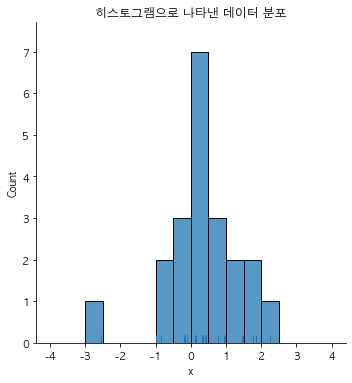

In [17]:
np.random.seed(0)
x = np.random.normal(size=21) 
print(x)

bins = np.linspace(-4, 4, 17)
sns.displot(x, rug = True, kde = False, bins = bins) 
plt.title('히스토그램으로 나타낸 데이터 분포') 
plt.xlabel('x')
plt.show()

### 대칭인 분포를 비대칭으로 만드는 데이터가 더해졌을 때 표본평균, 표본중앙값, 표본최빈값의 변화

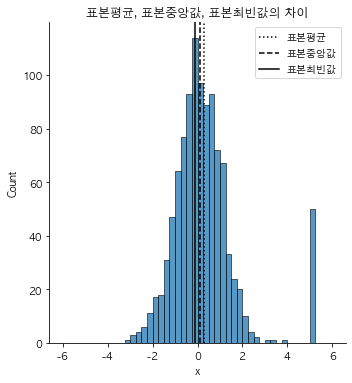

In [18]:
np.random.seed(1)
x = np.random.normal(size=1000)
x = np.hstack([x, 5 * np.ones(50)])
bins = np.linspace(-6, 6, 12 * 4 + 1)
ns, _ = np.histogram(x, bins=bins)

sample_mean = np.mean(x)
sample_median = np.median(x)
mode_index = np.argmax(ns)
sample_mode = 0.5 * (bins[mode_index] + bins[mode_index + 1])

sns.displot(x, bins=bins)

plt.axvline(sample_mean, c='k', ls=":", label="표본평균")
plt.axvline(sample_median, c='k', ls="--", label="표본중앙값")
plt.axvline(sample_mode, c='k', ls="-", label="표본최빈값")

plt.title("표본평균, 표본중앙값, 표본최빈값의 차이")
plt.xlabel("x")
plt.legend()
plt.show()

### 표본 모멘트

In [19]:
print(sp.stats.skew(x)) #표본 왜도
print(sp.stats.kurtosis(x))# 표본 첨도

print(sp.stats.moment(x, 1))
print(sp.stats.moment(x, 2))
print(sp.stats.moment(x, 3))
print(sp.stats.moment(x, 4))

1.483455252566149
3.522807122867409
0.0
2.032795146183378
4.299469507677599
26.953909563990607


## 기댓값과 확률 변수의 변환

### 회전하는 원반을 이용하여 복권 번호를 결정하는 문제에서의 기댓값

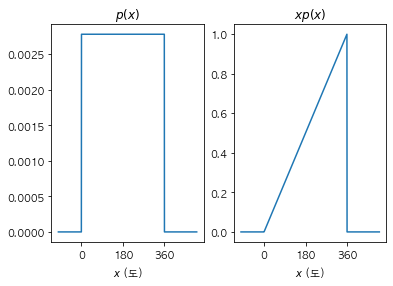

In [20]:
x = np.linspace(-100, 500, 1000)
p = np.zeros_like(x)
p[(0 < x) & (x <= 360)] = 1 / 360
xp = x * p

plt.subplot(121)
plt.plot(x, p)
plt.xticks([0, 180, 360])
plt.title("$p(x)$")
plt.xlabel("$x$ (도)")

plt.subplot(122)
plt.plot(x, xp)
plt.xticks([0, 180, 360])
plt.title("$xp(x)$")
plt.xlabel("$x$ (도)")

plt.show()

### 0도에서 180도 사이에 화살이 2배 더 잘 박히도록 원반이 조작된 경우

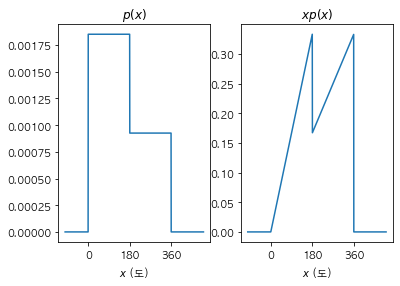

In [21]:
x = np.linspace(-100, 500, 1000)
p = np.zeros_like(x)
p[(0 < x) & (x <= 180)] = 2 / (3 * 360)
p[(180 < x) & (x <= 360)] = 1 / (3 * 360)
xp = x * p

plt.subplot(121)
plt.plot(x, p)
plt.xticks([0, 180, 360])
plt.title("$p(x)$")
plt.xlabel("$x$ (도)")

plt.subplot(122)
plt.plot(x, xp)
plt.xticks([0, 180, 360])
plt.title("$xp(x)$")
plt.xlabel("$x$ (도)")\

plt.show()

## 확률 분포

### 단순 사건과 확률 질량 함수

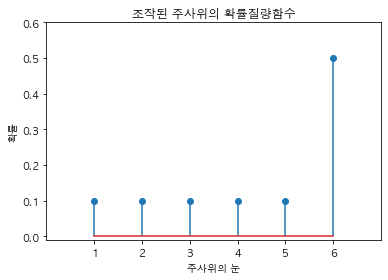

In [22]:
x = np.arange(1, 7)
y = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.5])
plt.stem(x, y)
plt.title("조작된 주사위의 확률질량함수")
plt.xlabel("주사위의 눈")
plt.ylabel("확률")
plt.xlim(0, 7)
plt.ylim(-0.01, 0.6)
plt.xticks(np.arange(6) + 1)
plt.show()

### 누적 분포 함수

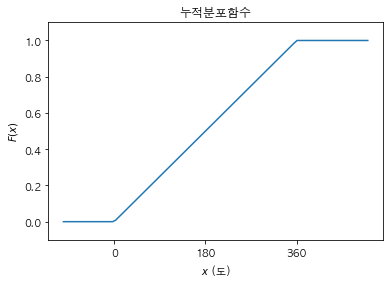

In [23]:
t = np.linspace(-100, 500, 100)
F = t / 360
F[t < 0] = 0
F[t > 360] = 1
plt.plot(t, F)
plt.ylim(-0.1, 1.1)
plt.xticks([0, 180, 360])
plt.title("누적분포함수")
plt.xlabel("$x$ (도)")
plt.ylabel("$F(x)$")
plt.show()

### 확률 밀도 함수

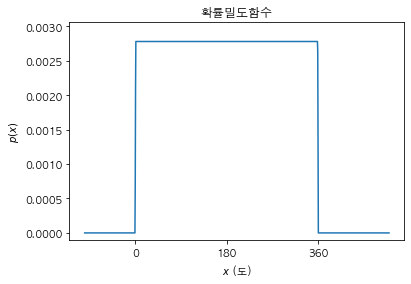

In [24]:
t = np.linspace(-100, 500, 1000)
F = t / 360
F[t < 0] = 0
F[t > 360] = 1
p = np.gradient(F, 600/1000)  # 수치미분
plt.plot(t, p)
plt.ylim(-0.0001, p.max()*1.1)
plt.xticks([0, 180, 360])
plt.title("확률밀도함수")
plt.xlabel("$x$ (도)")
plt.ylabel("$p(x)$")
plt.show()

## 다변수 확률 변수

### 결합 질량 함수

In [25]:
#데이터 생성
grades = ["A", "B", "C", "D", "E", "F"]
scores = pd.DataFrame(
    [[1, 2, 1, 0, 0, 0],
     [0, 2, 3, 1, 0, 0],
     [0, 4, 7, 4, 1, 0],
     [0, 1, 4, 5, 4, 0],
     [0, 0, 1, 3, 2, 0],
     [0, 0, 0, 1, 2, 1]], 
    columns=grades, index=grades)
scores.index.name = "Y"
scores.columns.name = "X"
print(scores)
print()

#결합 질량 함수
pmf = scores / scores.values.sum()
print(pmf)

X  A  B  C  D  E  F
Y                  
A  1  2  1  0  0  0
B  0  2  3  1  0  0
C  0  4  7  4  1  0
D  0  1  4  5  4  0
E  0  0  1  3  2  0
F  0  0  0  1  2  1

X     A     B     C     D     E     F
Y                                    
A  0.02  0.04  0.02  0.00  0.00  0.00
B  0.00  0.04  0.06  0.02  0.00  0.00
C  0.00  0.08  0.14  0.08  0.02  0.00
D  0.00  0.02  0.08  0.10  0.08  0.00
E  0.00  0.00  0.02  0.06  0.04  0.00
F  0.00  0.00  0.00  0.02  0.04  0.02


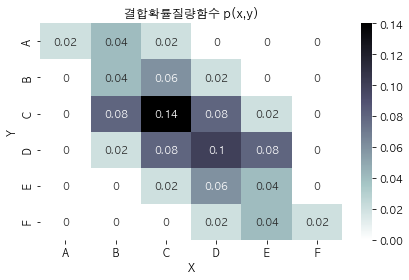

In [26]:
#히트맵
sns.heatmap(pmf, cmap=matplotlib.cm.bone_r, annot=True,
            xticklabels=['A', 'B', 'C', 'D', 'E', 'F'],
            yticklabels=['A', 'B', 'C', 'D', 'E', 'F'])
plt.title("결합확률질량함수 p(x,y)")
plt.tight_layout()
plt.show()

### 주변 확률 질량 함수

In [27]:
pmf_marginal_x = pmf.sum(axis=0)
print(pmf_marginal_x)
print()

pmf_marginal_y = pmf.sum(axis=1)
print(pmf_marginal_y[:, np.newaxis])

X
A    0.02
B    0.18
C    0.32
D    0.28
E    0.18
F    0.02
dtype: float64

[[0.08]
 [0.12]
 [0.32]
 [0.28]
 [0.12]
 [0.08]]


/var/folders/98/j21dd2qs46b69mwc94dgyxnr0000gn/T/ipykernel_18474/3994308573.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  print(pmf_marginal_y[:, np.newaxis])


### 조건부 확률 질량 함수

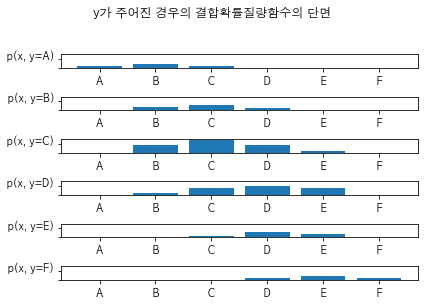

In [28]:
import string

x = np.arange(6)
for i, y in enumerate(string.ascii_uppercase[:6]):
    ax = plt.subplot(6, 1, i + 1)
    ax.tick_params(labelleft=False)
    plt.bar(x, pmf.iloc[i, :])
    plt.ylabel("p(x, y={})".format(y), rotation=0, labelpad=30)
    plt.ylim(0, 0.15)
    plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])

plt.suptitle("y가 주어진 경우의 결합확률질량함수의 단면", y=1.05)
plt.tight_layout()
plt.show()

In [29]:
#Y의 값이 A 일 때의 조건부확률질량함수
print(pmf.iloc[0, :])

X
A    0.02
B    0.04
C    0.02
D    0.00
E    0.00
F    0.00
Name: A, dtype: float64


In [30]:
#Y의 값이 A 일 때의 조건부확률질량함수
print(pmf.iloc[0, :])
print()
print(np.sum(pmf.iloc[0, :]))

X
A    0.02
B    0.04
C    0.02
D    0.00
E    0.00
F    0.00
Name: A, dtype: float64

0.08


In [31]:
cond_y0 = pmf.iloc[0, :]/pmf_marginal_y[0]
print(cond_y0)
print()
print(np.sum(cond_y0))

X
A    0.25
B    0.50
C    0.25
D    0.00
E    0.00
F    0.00
Name: A, dtype: float64

1.0


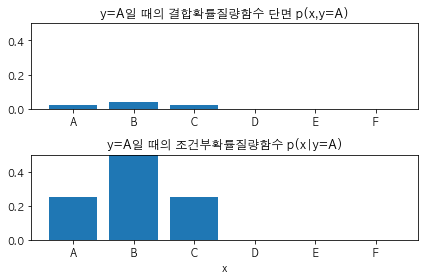

In [32]:
plt.subplot(211)
plt.bar(x, pmf.iloc[0, :])
plt.ylim(0, 0.5)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.title("y=A일 때의 결합확률질량함수 단면 p(x,y=A)")
plt.subplot(212)
plt.bar(x, cond_y0)
plt.ylim(0, 0.5)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.title("y=A일 때의 조건부확률질량함수 p(x|y=A)")
plt.xlabel("x")
plt.tight_layout()
plt.show()

### 결합 확률 밀도 함수

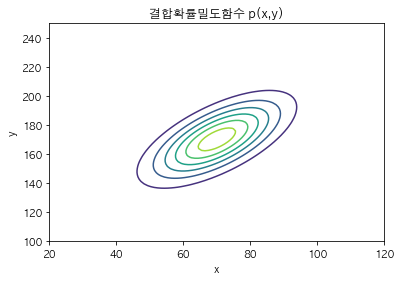

In [33]:
#어떤 집단에 대해 X는 몸무게. Y는 키를 나타내는 확률변수라고 가정
mu = [70, 170]
cov = [[150, 140], [140, 300]]
rv = sp.stats.multivariate_normal(mu, cov)

xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 100)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))
plt.contour(XX, YY, ZZ)
plt.xlabel("x")
plt.ylabel("y")
plt.title("결합확률밀도함수 p(x,y)")
plt.show()

### 주변 확률 밀도 함수

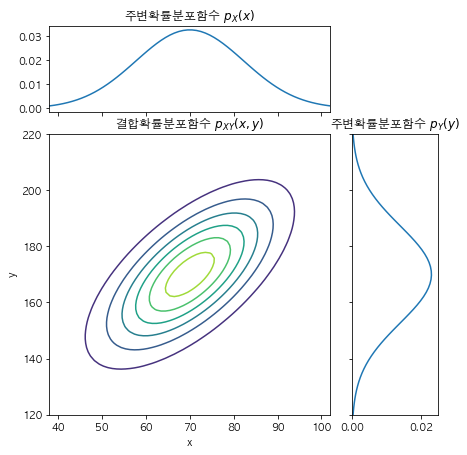

In [34]:
from matplotlib.ticker import NullFormatter
from matplotlib import transforms
from scipy.integrate import simps  # 심슨법칙(Simpson's rule)을 사용한 적분 계산

xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 100)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))
fx = [simps(Z, yy) for Z in ZZ.T]
fy = [simps(Z, xx) for Z in ZZ]

plt.figure(figsize=(6, 6))

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.05

rect1 = [left, bottom, width, height]
rect2 = [left, bottom_h, width, 0.2]
rect3 = [left_h, bottom, 0.2, height]

ax1 = plt.axes(rect1)
ax2 = plt.axes(rect2)
ax3 = plt.axes(rect3)

ax2.xaxis.set_major_formatter(NullFormatter())
ax3.yaxis.set_major_formatter(NullFormatter())

ax1.contour(XX, YY, ZZ)
ax1.set_title("결합확률분포함수 $p_{XY}(x, y)$")
ax1.set_xlabel("x")
ax1.set_ylabel("y")

ax2.plot(xx, fx)
ax2.set_title("주변확률분포함수 $p_X(x)$")

base = ax3.transData
rot = transforms.Affine2D().rotate_deg(-90)
plt.plot(-yy, fy, transform=rot + base)
plt.title("주변확률분포함수 $p_Y(y)$")

ax1.set_xlim(38, 102)
ax1.set_ylim(120, 220)
ax2.set_xlim(38, 102)
ax3.set_xlim(0, 0.025)
ax3.set_ylim(120, 220)

plt.show()

### 조건부 확률 밀도 함수

/var/folders/98/j21dd2qs46b69mwc94dgyxnr0000gn/T/ipykernel_18474/3502675597.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


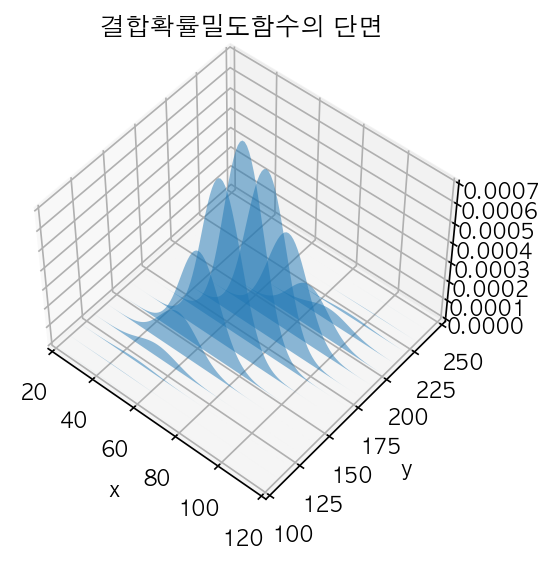

In [35]:
from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors

xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 16)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))

fig = plt.figure(dpi=150)
ax = fig.gca(projection='3d')

xs = np.hstack([0, xx, 0])
zs = np.zeros_like(xs)
verts = []
for i, y in enumerate(yy):
    zs[1:-1] = ZZ[i]
    verts.append(list(zip(xx, zs)))

poly = PolyCollection(verts)
poly.set_alpha(0.5)
ax.add_collection3d(poly, zs=yy, zdir='y')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(20, 120)
ax.set_ylim(100, 250)
ax.set_zlim3d(0, 0.0007)
ax.view_init(50, -50)
plt.title("결합확률밀도함수의 단면")
plt.show()

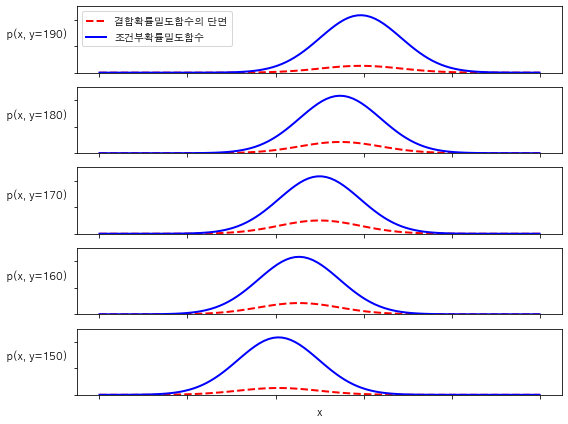

In [36]:
from scipy.integrate import simps  # 심슨법칙(Simpson's rule)을 사용한 적분 계산

mag = 10 # 확대 비율
xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 16)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))
plt.figure(figsize=(8, 6))
for i, j in enumerate(range(9, 4, -1)):
    ax = plt.subplot(5, 1, i + 1)
    ax.tick_params(labelleft=False)
    plt.plot(xx, ZZ[j, :] * mag, 'r--', lw=2, label="결합확률밀도함수의 단면")
    marginal = simps(ZZ[j, :], xx)
    plt.plot(xx, ZZ[j, :] / marginal, 'b-', lw=2, label="조건부확률밀도함수")
    plt.ylim(0, 0.05)
    ax.xaxis.set_ticklabels([])
    plt.ylabel("p(x, y={:.0f})".format(yy[j]), rotation=0, labelpad=40)
    if i == 0: 
        plt.legend(loc=2)
plt.xlabel("x")
plt.tight_layout()
plt.show()

### 조건부 확률 분포

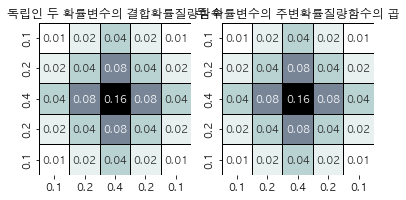

In [37]:
pmf1 = np.array([[1, 2,  4, 2, 1],
                 [2, 4,  8, 4, 2],
                 [4, 8, 16, 8, 4],
                 [2, 4,  8, 4, 2],
                 [1, 2,  4, 2, 1]])
pmf1 = pmf1/pmf1.sum()

pmf1_marginal_x = np.round(pmf1.sum(axis=0), 2)
pmf1_marginal_y = np.round(pmf1.sum(axis=1), 2)
pmf1x = pmf1_marginal_x * pmf1_marginal_y[:, np.newaxis]

plt.subplot(121)
sns.heatmap(pmf1, cmap=matplotlib.cm.bone_r, annot=True, square=True, linewidth=1, linecolor="k",
            cbar=False, xticklabels=pmf1_marginal_x, yticklabels=pmf1_marginal_y)
plt.title("독립인 두 확률변수의 결합확률질량함수")

plt.subplot(122)
pmf1x = pmf1_marginal_x * pmf1_marginal_y[:, np.newaxis]
sns.heatmap(pmf1x, cmap=matplotlib.cm.bone_r, annot=True, square=True, linewidth=1, linecolor="k",
            cbar=False, xticklabels=pmf1_marginal_x, yticklabels=pmf1_marginal_y)
plt.title("두 확률변수의 주변확률질량함수의 곱")

plt.show()

In [38]:
#여러 가지 Y 값을 바꾸어도 조건부 확률은 변하지 않는 것
cond_x_y0 = pmf1[0, :]/pmf1_marginal_y[0]
print(cond_x_y0)

cond_x_y1 = pmf1[1, :]/pmf1_marginal_y[1]
print(cond_x_y1)

[0.1 0.2 0.4 0.2 0.1]
[0.1 0.2 0.4 0.2 0.1]


### 조건부 확률 분포 – 상관 관계가 있는 두 확률 변수

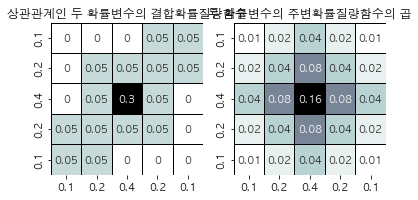

In [39]:
pmf2 = np.array([[0, 0,  0, 5, 5],
                 [0, 5,  5, 5, 5],
                 [0, 5, 30, 5, 0],
                 [5, 5,  5, 5, 0],
                 [5, 5,  0, 0, 0]])
pmf2 = pmf2/pmf2.sum()

pmf2_marginal_x = np.round(pmf2.sum(axis=0), 2)
pmf2_marginal_y = np.round(pmf2.sum(axis=1), 2)

plt.subplot(121)
sns.heatmap(pmf2, cmap=matplotlib.cm.bone_r, annot=True, square=True, linewidth=1, linecolor="k",
            cbar=False, xticklabels=pmf2_marginal_x, yticklabels=pmf2_marginal_y)
plt.title("상관관계인 두 확률변수의 결합확률질량함수")

plt.subplot(122)
pmf2x = pmf2_marginal_x * pmf2_marginal_y[:, np.newaxis]
sns.heatmap(pmf2x, cmap=matplotlib.cm.bone_r, annot=True, square=True, linewidth=1, linecolor="k",
            cbar=False, xticklabels=pmf2_marginal_x, yticklabels=pmf2_marginal_y)
plt.title("두 확률변수의 주변확률질량함수의 곱")

plt.show()